Исходные данные:

In [103]:
delta = 1

Геометрические параметры пластины:

In [104]:
a = 10.0
b = 6.0
h = 0.073

Физические параметры материала:

In [105]:
E = 210 * 10**10
u = 0.3
ro = 7850
D = (E*h**3)/(12*(1-u**2))
rog = ro * 9.81

Работа с областью определения независимых переменных и сеткой узлов для вычисления параметров НДС, создание матрицы координат

In [106]:
import matplotlib as mpl
from matplotlib import *
import numpy as np
from numpy import *
xrange = 40
yrange = 40
xstep = a/xrange
ystep = b/yrange
xvec = np.arange(0, a + xstep, xstep)
yvec = np.arange(0, b + ystep/2, ystep)
xx = []
for i in range(yrange + 1):
    xx.append(xvec)
XX = np.array(xx)
yy = []
for i in range(xrange + 1):
    yy.append(yvec)
YY = np.array(yy).T
XX

array([[ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ],
       [ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ],
       [ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ],
       ...,
       [ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ],
       [ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ],
       [ 0.  ,  0.25,  0.5 , ...,  9.5 ,  9.75, 10.  ]])

Определяем переменную, определяющую точность численных процедур

In [107]:
TOL = 1*10**(-6)

Нагрузка от собственного веса конструкции

In [108]:
qdead = -rog * h
qdead

-5621.6205

Разложим нагрузку в двойной тригонометрический ряд

In [109]:
from math import *
def q1(m, n):
    return 12*qdead/(pi*m*n)
def p1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = q1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
dif = p1(a/2, b/2, 3)
print(dif)

-9543.559368125143


Построим эпюру нагрузки

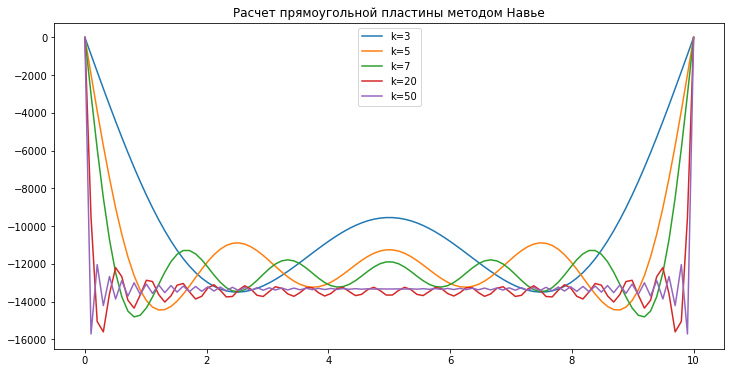

In [110]:
import matplotlib.pyplot as plt
x = np.linspace(0, a, 100)
y3 = [p1(i, b/2, 3) for i in x]
y5 = [p1(i, b/2, 5) for i in x]
y7 = [p1(i, b/2, 7) for i in x]
y20 = [p1(i, b/2, 20) for i in x]
y50 = [p1(i, b/2, 50) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y3, label="k=3")
ax.plot(x, y5, label="k=5")
ax.plot(x, y7, label="k=7")
ax.plot(x, y20, label="k=20")
ax.plot(x, y50, label="k=50")
ax.set_title("Расчет прямоугольной пластины методом Навье")
ax.legend()

Полезная нагрузка на пластину в виде прямоугольного штампа

Параметры нагружения

In [111]:
alpha = 3.5
betta = 2.0
c = 1.0
d = 2.0
q = -2000.0

Разложим нагрузку в двойной и тройной тригонометрический ряд

In [112]:
def q2(m, n):
    return 16*q/(pi**2*m*n)*sin(m*pi*alpha/a)*sin(n*pi*betta/b)*sin(m*pi*c/(2*a))*sin(n*pi*d/(2*b))
def p2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = q2(m, n)*sin(m*pi*x/a)*sin(n*pi*y/b)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
dif2 = p2(a/2, b/2, 3)
print(dif2)

-195.6879998948391


Построим эпюру полезной нагрузки в сечении, проходящем через центр прямоугольного штампа и посмотрим, как ведет себя представление в виде тригонометрического ряда при увеличении верхнего предела суммирования

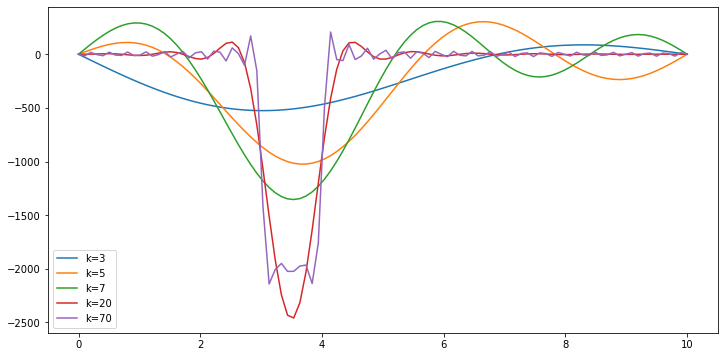

In [113]:
x = np.linspace(0, a, 100)
y3 = [p2(i, betta, 3) for i in x]
y5 = [p2(i, betta, 5) for i in x]
y7 = [p2(i, betta, 7) for i in x]
y20 = [p2(i, betta, 20) for i in x]
y70 = [p2(i, betta, 70) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y3, label="k=3")
ax.plot(x, y5, label="k=5")
ax.plot(x, y7, label="k=7")
ax.plot(x, y20, label="k=20")
ax.plot(x, y70, label="k=70")
ax.legend()

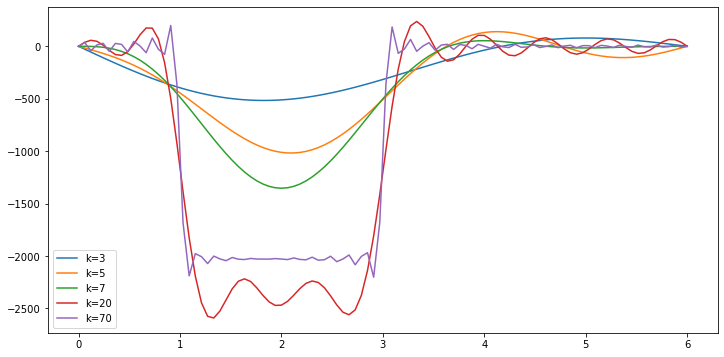

In [114]:
y = np.linspace(0, b, 100)
y3 = [p2(alpha, i, 3) for i in y]
y5 = [p2(alpha, i, 5) for i in y]
y7 = [p2(alpha, i, 7) for i in y]
y20 = [p2(alpha, i, 20) for i in y]
y70 = [p2(alpha, i, 70) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, y3, label="k=3")
ax.plot(y, y5, label="k=5")
ax.plot(y, y7, label="k=7")
ax.plot(y, y20, label="k=20")
ax.plot(y, y70, label="k=70")
ax.legend()

Определение матрицы наргузки

In [115]:
ZZ = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(p2(x, y, 70))
    ZZ.append(z1)
P2 = np.array(ZZ)

Построение 3D графика

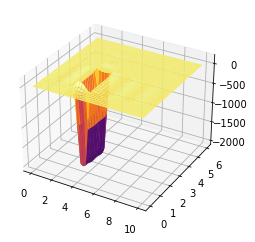

In [116]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, P2, cmap='inferno')

Сосредоточенная полезная нагрузка на пластину

Параметры нагружения

In [117]:
P = -11000.0
xp = 6.0
yp = 5.0

Разложим сосредоточенную нагрузку в двойной тригонометрический ряд

In [118]:
def q3(m, n):
    return 4*P/(a*b)*sin(m*pi*xp/a)*sin(n*pi*yp/b)
def p3(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = q3(m, n)*sin(m*pi*x/a)*sin(n*pi*y/b)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m

График

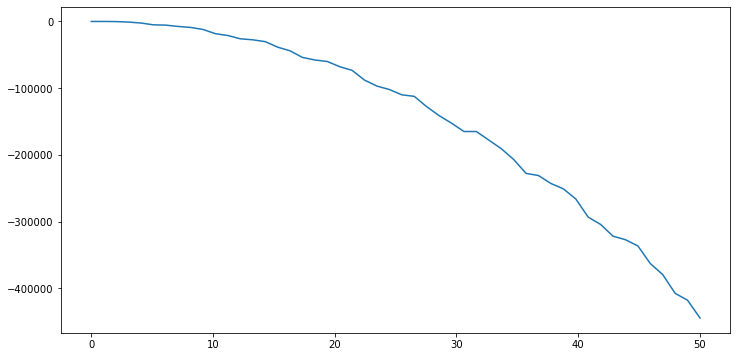

In [119]:
K = np.linspace(0, 50, 50)
z = [p3(xp, yp, int(i)) for i in K]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, z, label="k")

Определяем прогиб пластины от всех видов загружений, используя принцип независимости действия сил

Выделим две составляющих прогиба:
1) От действия собственного веса - эта нагрузка четная, суммирование необходимо вести только по нечетным членам ряда

2) От полезной нагрузки (штампа и сосредоточенной силы) - эта нагрузка общего вида, суммирование будем вести по всем членам ряда

Коэффициенты разложения прогибов в ряд:

Для собственного веса:

In [120]:
def A1(m, n):
    return q1(m, n)/(D*pi**4*((m/a)**2+(n/b)**2)**2)

Для полезной нагрузки:

In [121]:
def A2(m, n):
    return (q2(m, n) + q3(m, n))/(D*pi**4*((m/a)**2+(n/b)**2)**2)

Составляющая прогиба от собственного веса:

In [122]:
def w1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = A1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m

Составляющая прогиба от полезной нагрузки:

In [123]:
def w2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = A1(m, n)*sin(m*pi*x/a)*sin(n*pi*y/b)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m

Суммарный прогиб:

In [124]:
def w(x, y, k):
    return w1(x, y, k) + w2(x, y, k)

Исследуем сходдимость рядов для прогибов для определения необходимого верхнего предела суммирования

Для исследования сходимости выбираем наиболее неблагоприятную точку - место приложения сосредоточенной нагрузки

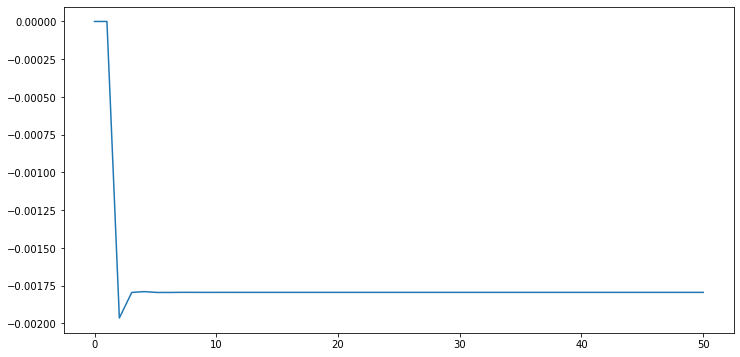

In [125]:
K = np.linspace(0, 50, 50)
z = [w(xp, yp, int(i)) for i in K]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, z, label="k")

Для количественной оценки сходимости введем функцию сходимости вида:

In [126]:
def wconv(k):
    return (w(xp, yp, k+1)-w(xp, yp, k))/w(xp, yp, k)*100

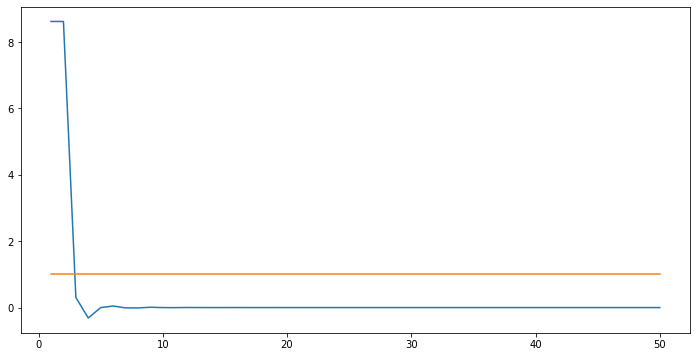

In [127]:
K = np.linspace(1, 50, 50)
K = K.tolist()
z = []
ones = np.ones(50)
for i in range(len(K)):
    if w(xp, yp, int(K[i])) != 0:
        z.append(-wconv(int(K[i])))
    else:
        z.append(-wconv(int(K[i+1])))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, z, label="k")
ax.plot(K, ones, label="1%")

Определяем, при каком количестве учтенных членов ряда решение сходится

In [128]:
-wconv(3)

0.30296618132050385

Определяем максимальный прогиб пластины

Вычисляем матрицу прогибов

In [129]:
z = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(w(x, y, 3))
    z.append(z1)
W = np.array(z)
W

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.30958866e-05, -6.58292469e-05, ...,
        -4.71584654e-05, -2.36441291e-05, -3.69014181e-20],
       [ 0.00000000e+00, -6.59297551e-05, -1.31137691e-04, ...,
        -9.39688107e-05, -4.71136576e-05, -7.35303045e-20],
       ...,
       [ 0.00000000e+00, -5.79400826e-05, -1.15265176e-04, ...,
        -9.04188318e-05, -4.53620541e-05, -7.08113281e-20],
       [ 0.00000000e+00, -2.90512542e-05, -5.77940629e-05, ...,
        -4.53613505e-05, -2.27574103e-05, -3.55249837e-20],
       [ 0.00000000e+00, -4.53409874e-20, -9.02005296e-20, ...,
        -7.08096992e-20, -3.55247176e-20, -5.54551678e-35]])

Прогиб в центре пластины

In [130]:
w(a/2, b/2, 3)

-0.004046879511563692

Прогиб в центре прямоугольного штампа

In [131]:
w(alpha, betta, 3)

-0.003501596631706765

Прогиб в точке приложения сосредоточенной силы

In [132]:
w(xp, yp, 3)

-0.0017944176996689562

Максимальный прогиб

In [133]:
wmax = 0
for i in W:
    for j in i:
        if wmax > j:
            wmax = j
wmax

-0.004107457212025813

Ищем координаты точки с максимальным прогибом

In [134]:
xwmax = 0
ywmax = 0
for ind1, i in enumerate(W):
    for ind2, j in enumerate(i):
        if j == wmax:
            xwmax = XX[0][ind2]
            ywmax = yvec[ind1]
xwmax, ywmax

(4.5, 2.85)

Предельный прогиб в соответствии с СП 20.13330.2016 "Нагрузки и воздействия":

In [135]:
wu = min(a, b)/200
wu

0.03

Делаем вывод:

In [136]:
if wmax < wu:
    print("Максимальный прогиб меньше предельного")
else:
    print("Максимальный прогиб превышает предельный")

Максимальный прогиб меньше предельного


Строим эпюры прогибов в сечениях, проходящих через точку с максимальным прогибом

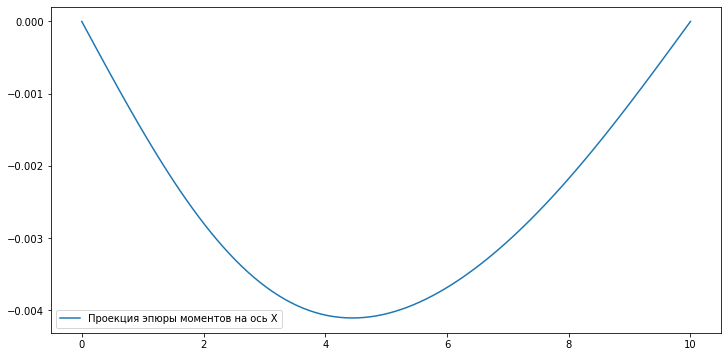

In [137]:
x = np.linspace(0, a, 100)
z = [w(i, ywmax, 3) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z, label="Проекция эпюры моментов на ось X")
ax.legend()

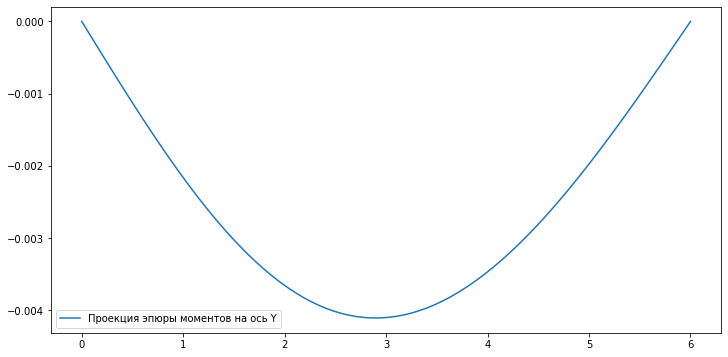

In [138]:
y = np.linspace(0, b, 100)
z = [w(xwmax, i, 3) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z, label="Проекция эпюры моментов на ось Y")
ax.legend()

Построим эпюры изгибающих моментов в виде 3D графика

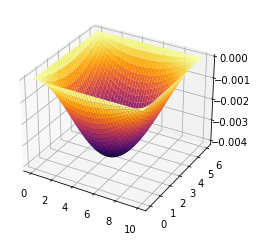

In [139]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, W, cmap='inferno')

Определяем внутренние усилия в пластине

Ищем необходимые производные от функции прогиба, в виде суммы произвольных прогибов, вызываемых собственным весом и полезной нагрузкой:

In [140]:
def d2w_x1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)*((2*m-1)*pi/a)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_x2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*sin(m*pi*x/a)*sin(n*pi*y/b)*(m*pi/a)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_x(x, y, k):
    return d2w_x1(x, y, k) + d2w_x2(x, y, k)
def d2w_y1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)*((2*n-1)*pi/b)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_y2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*sin(m*pi*x/a)*sin(n*pi*y/b)*(n*pi/b)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_y(x, y, k):
    return d2w_y1(x, y, k) + d2w_y2(x, y, k)
def d2w_xy1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = A1(2*m-1, 2*n-1)*cos((2*m-1)*pi*x/a)*cos((2*n-1)*pi*y/b)*((2*n-1)*pi/b)*((2*m-1)*pi/a)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_xy2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = A2(m, n)*cos(m*pi*x/a)*cos(n*pi*y/b)*(n*pi/b)*(m*pi/a)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d2w_xy(x, y, k):
    return d2w_xy1(x, y, k) + d2w_xy2(x, y, k)
def d3w_x1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*cos((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)*((2*m-1)*pi/a)**3
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_x2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*cos(m*pi*x/a)*sin(n*pi*y/b)*(m*pi/a)**3
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_x(x, y, k):
    return d3w_x1(x, y, k) + d3w_x2(x, y, k)
def d3w_y1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*cos((2*n-1)*pi*y/b)*((2*n-1)*pi/b)**3
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_y2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*sin(m*pi*x/a)*cos(n*pi*y/b)*(n*pi/b)**3
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_y(x, y, k):
    return d3w_y1(x, y, k) + d3w_y2(x, y, k)
def d3w_xy21(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*cos((2*m-1)*pi*x/a)*sin((2*n-1)*pi*y/b)*((2*n-1)*pi/b)**2*((2*m-1)*pi/a)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_xy22(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*cos(m*pi*x/a)*sin(n*pi*y/b)*(n*pi/b)**2*(m*pi/a)
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_xy2(x, y, k):
    return d3w_xy21(x, y, k) + d3w_xy22(x, y, k)
def d3w_x2y1(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A1(2*m-1, 2*n-1)*sin((2*m-1)*pi*x/a)*cos((2*n-1)*pi*y/b)*((2*n-1)*pi/b)*((2*m-1)*pi/a)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_x2y2(x, y, k):
    sum_m = 0
    for m in range(k):
        if m > 0:
            sum_n = 0
            for n in range(k):
                if n > 0:
                    elem = -A2(m, n)*sin(m*pi*x/a)*cos(n*pi*y/b)*(n*pi/b)*(m*pi/a)**2
                    sum_n = sum_n + elem
            sum_m = sum_m + sum_n
    return sum_m
def d3w_x2y(x, y, k):
    return d3w_x2y1(x, y, k) + d3w_x2y2(x, y, k)

Изгибающие моменты:

In [141]:
def Mx(x, y, k):
    return -D*(d2w_x(x, y, k)+u*d2w_y(x, y, k))
def My(x, y, k):
    return -D*(d2w_y(x, y, k)*d2w_x(x, y, k))

Крутящий момент:

In [142]:
def Mxy(x, y, k):
    return -D*(1-u)*d2w_xy(x, y, k)

Поперечные силы:

In [143]:
def Qx(x, y, k):
    return -D*(d3w_x(x, y, k)+d3w_xy2(x, y, k))
def Qy(x, y, k):
    return -D*(d3w_y(x, y, k)+d3w_x2y(x, y, k))

Исследуем сходимость рядов для внутренних усилий

Вводим функции сходимости для внутренних усилий (достаточно по одной для каждой группы усилий)

In [144]:
def MXconv(k):
    return (Mx(xp, yp, k+1)-Mx(xp, yp, k))/Mx(xp, yp, k)*100
def MXYconv(k):
    return (Mxy(xp, yp, k+1)-Mxy(xp, yp, k))/Mxy(xp, yp, k)*100
def QXconv(k):
    return (Qx(xp, yp, k+1)-Qx(xp, yp, k))/Qx(xp, yp, k)*100
def Q2Xconv(k):
    return (Qx(0, b/2, k+1)-Qx(0, b/2, k))/Qx(0, b/2, k)*100

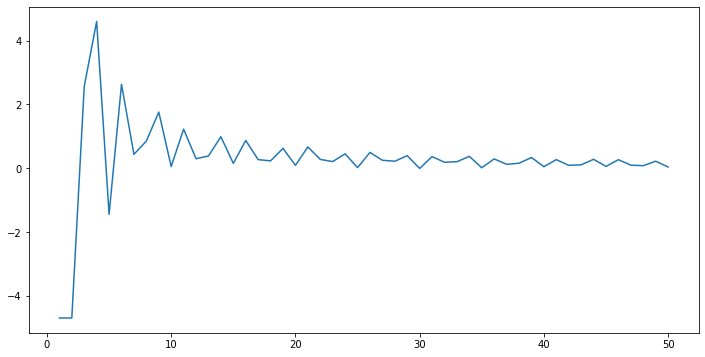

In [145]:
K = np.linspace(1, 50, 50)
K = K.tolist()
mx = []
for i in range(len(K)):
    try:
        mx.append(MXconv(int(K[i])))
    except ZeroDivisionError:
        mx.append(MXconv(int(K[i+1])))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, mx, label="k")

In [146]:
MXconv(3)

2.5664031435007426

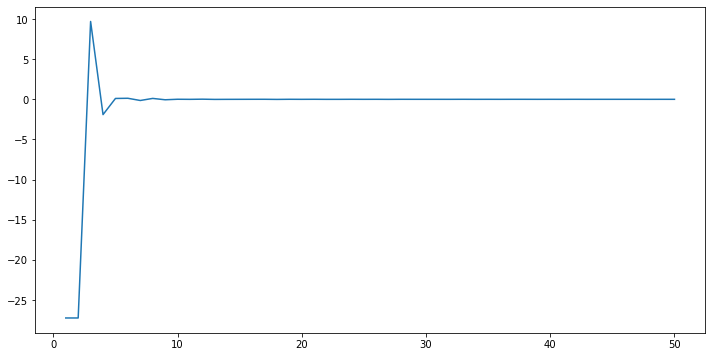

In [147]:
mxy = []
for i in range(len(K)):
    try:
        mxy.append(MXYconv(int(K[i])))
    except ZeroDivisionError:
        mxy.append(MXYconv(int(K[i+1])))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, mxy, label="k")

In [148]:
MXYconv(4)

-1.904660088710283

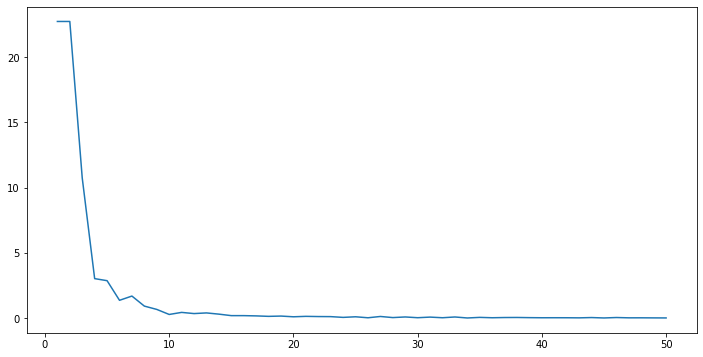

In [149]:
q2x = []
for i in range(len(K)):
    try:
        q2x.append(Q2Xconv(int(K[i])))
    except ZeroDivisionError:
        q2x.append(Q2Xconv(int(K[i+1])))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, q2x, label="k")

In [150]:
Q2Xconv(4)

3.0239706628147225

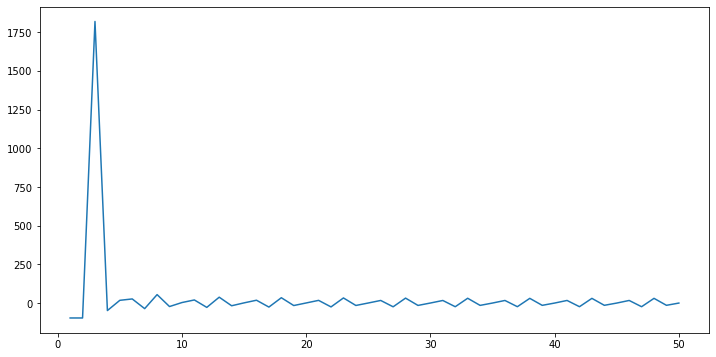

In [151]:
qx = []
for i in range(len(K)):
    try:
        qx.append(QXconv(int(K[i])))
    except ZeroDivisionError:
        qx.append(QXconv(int(K[i+1])))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, qx, label="k")

In [152]:
QXconv(14)

-17.327851288423343

Для удовлетворения 5-процентному критерию сходимости для всех функций достаточно удержать 14 членов ряда

Строим эпюры внутренних усилий

Вычисляем матрицы внутренних усилий

In [153]:
kf = 14
mx = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(Mx(x, y, kf))
    mx.append(z1)
MX = np.array(mx)
my = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(My(x, y, kf))
    my.append(z1)
MY = np.array(my)
qx = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(Qx(x, y, kf))
    qx.append(z1)
QX = np.array(qx)
qy = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(Qy(x, y, kf))
    qy.append(z1)
QY = np.array(qy)
mxy = []
for y in yvec:
    z1 = []
    for x in XX[0]:
        z1.append(Mxy(x, y, kf))
    mxy.append(z1)
MXY = np.array(mxy)

Строим эпюры изгибающих моментов в сечениях, проходящих через центр пластины:

Text(0.5, 1.0, 'Эпюра Mx (сечение по середине b)')

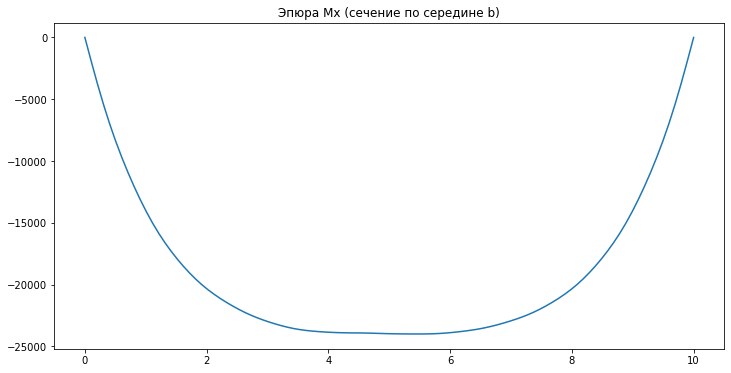

In [154]:
x = np.linspace(0, a, 100)
z = [Mx(i, b/2, 14) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z)
ax.set_title("Эпюра Mx (сечение по середине b)")

Text(0.5, 1.0, 'Эпюра Mx (сечение по середина а)')

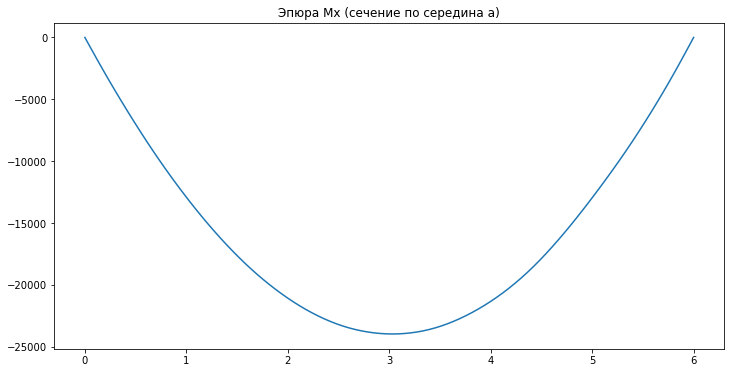

In [155]:
y = np.linspace(0, b, 100)
z = [Mx(a/2, i, 14) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z)
ax.set_title("Эпюра Mx (сечение по середина а)")

Text(0.5, 1.0, 'Эпюра My (сечение по середине b)')

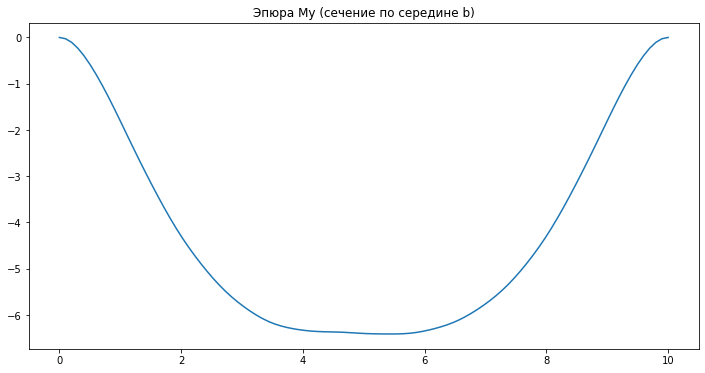

In [156]:
x = np.linspace(0, a, 100)
z = [My(i, b/2, 14) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z)
ax.set_title("Эпюра My (сечение по середине b)")

Text(0.5, 1.0, 'Эпюра My (сечение по середина а)')

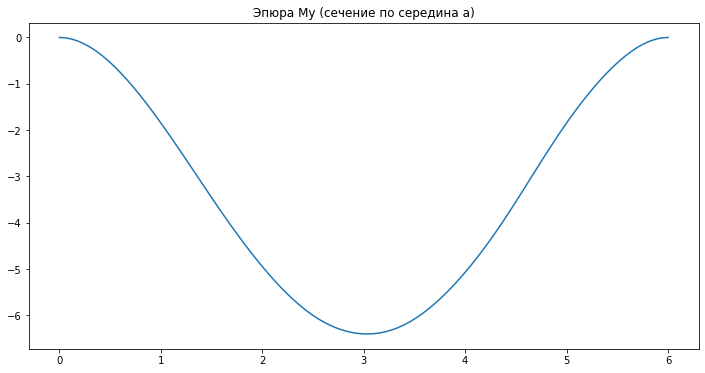

In [157]:
y = np.linspace(0, b, 100)
z = [My(a/2, i, 14) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z)
ax.set_title("Эпюра My (сечение по середина а)")

Построим эпюры изгибающих моментов в виде 3D графика

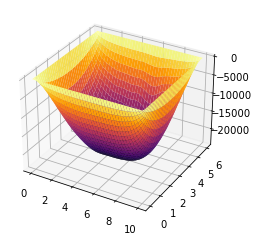

In [158]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, MX, cmap='inferno')

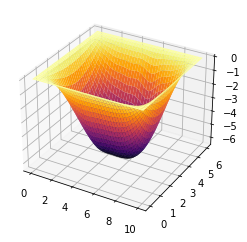

In [159]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, MY, cmap='inferno')

Строим эпюры крутящего момента в сечениях, проходящих через край пластины:

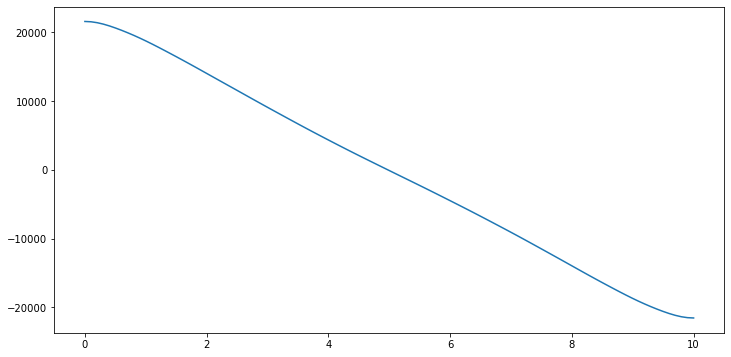

In [160]:
x = np.linspace(0, a, 100)
z = [Mxy(i, 0, 14) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z)

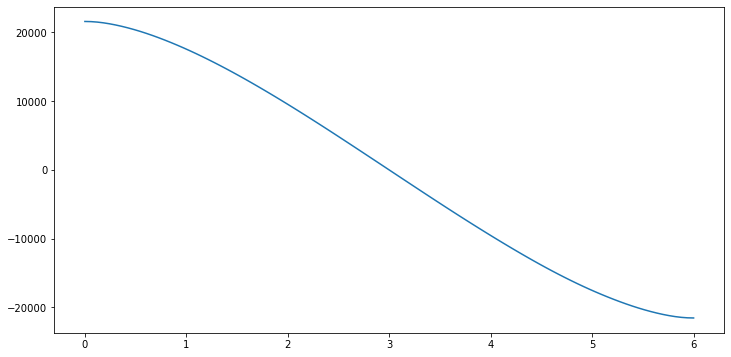

In [161]:
y = np.linspace(0, b, 100)
z = [Mxy(0, i, 14) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z)

Построим эпюру крутящего момента в виде 3D графика:

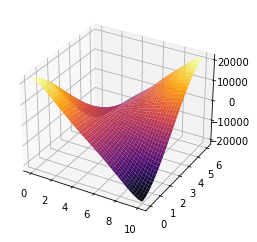

In [162]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, MXY, cmap='inferno')

Строим эпюры поперечных сил в сечениях, проходящих через край пластины:

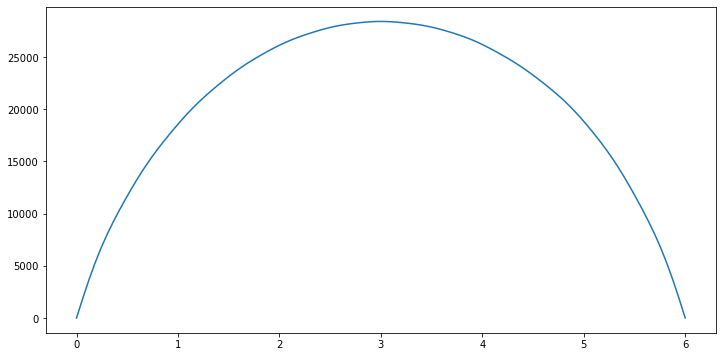

In [163]:
y = np.linspace(0, b, 100)
z = [Qx(a, i, 14) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z)

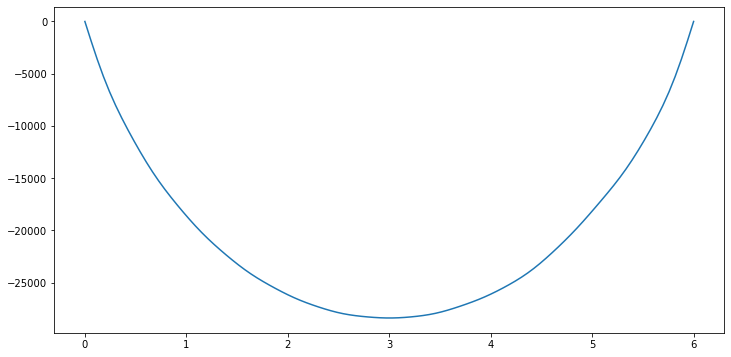

In [164]:
y = np.linspace(0, b, 100)
z = [Qx(0, i, 14) for i in y]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, z)

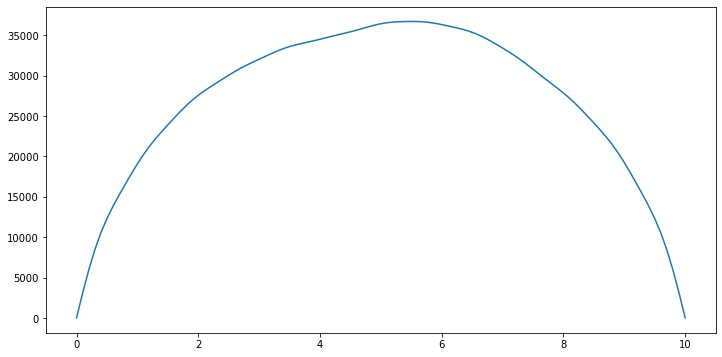

In [165]:
x = np.linspace(0, a, 100)
z = [Qy(i, b, 14) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z)

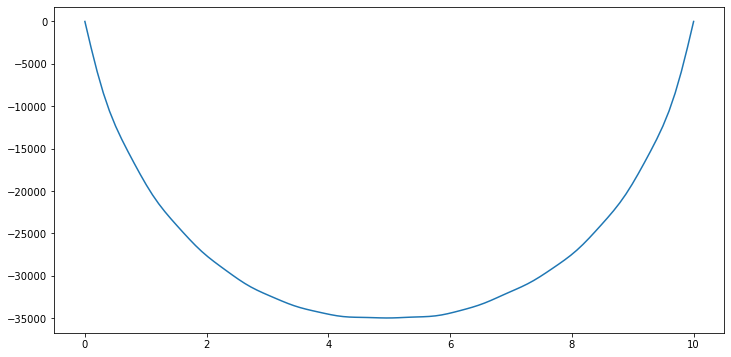

In [166]:
x = np.linspace(0, a, 100)
z = [Qy(i, 0, 14) for i in x]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, z)

Построим эпюру поперечных сил в виде 3D графика:

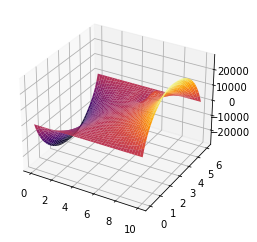

In [167]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, QX, cmap='inferno')

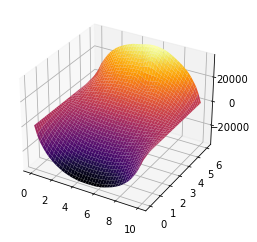

In [168]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(XX, YY, QY, cmap='inferno')

Определяем максимальные значения внутренних усилий

Определяем экстремальные значения внутренних усилий

In [169]:
def Min(M):
    Mmin = 0
    for i in M:
        for j in i:
            if Mmin > j:
                Mmin = j
    return Mmin
def Max(M):
    Mmax = -10**20
    for i in M:
        for j in i:
            if Mmax < j:
                Mmax = j
    return Mmax

In [170]:
Mxmin = Min(MX)
Mxmin

-23990.409192938136

In [171]:
Mxmax = Max(MX)
Mxmax

-0.0

In [172]:
Mymin = Min(MY)
Mymin

-6.410178463800066

In [173]:
Mymax = Max(MY)
Mymax

-0.0

In [174]:
Qxmin = Min(QX)
Qxmin

-28389.740534200126

In [175]:
Qxmax = Max(QX)
Qxmax

28406.197367747925

In [176]:
Qymin = Min(QY)
Qymin

-34978.51467590973

In [177]:
Qymax = Max(QY)
Qymax

36700.4230558778

In [178]:
Mxymin = Min(MXY)
Mxymin

-21559.76292541557

In [179]:
Mxymax = Max(MXY)
Mxymax

21676.8889518248

Определяем напряжения в пластине:

In [180]:
SX = 6*MX/h**2
SY = 6*MY/h**2
TXY = 6*MXY/h**2
TZX = 3*QX/(2*h)
TZY = 3*QY/(2*h)

Определяем максимальные напряжения в пластине:

In [181]:
Gxmax = Max(SX)
Gxmax

-0.0

In [182]:
Gxmin = Min(SX)
Gxmin

-27011156.907042377

In [183]:
Gymax = Max(SY)
Gymax

-0.0

In [184]:
Gymin = Min(SY)
Gymin

-7217.314840082642

In [185]:
Txymax = Max(TXY)
Txymax

24406330.21410186

In [186]:
Txymin = Min(TXY)
Txymin

-24274456.286825564

In [187]:
Tzxmax = Max(TZX)
Tzxmax

583688.987008519

In [188]:
Tzxmin = Min(TZX)
Tzxmin

-583350.8328945232

In [189]:
Tzymax = Max(TZY)
Tzymax

754118.2819700919

In [190]:
Tzymin = Min(TZY)
Tzymin

-718736.6029296521

Определяем главные напряжения:

In [191]:
def G1(gx, gy, txy):
    return 0.5*(gx + gy)+0.5*sqrt((gx-gy)**2+4*txy**2)
def G3(gx, gy, txy):
    return 0.5*(gx + gy)-0.5*sqrt((gx-gy)**2+4*txy**2)

In [192]:
SX

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -6.88663756e+05, -1.13885668e+06, ...,
        -1.14095600e+06, -6.90388684e+05, -1.16382461e-09],
       [-0.00000000e+00, -1.28847064e+06, -2.17394576e+06, ...,
        -2.17665040e+06, -1.29054403e+06, -2.16663653e-09],
       ...,
       [-0.00000000e+00, -1.28198187e+06, -2.16714989e+06, ...,
        -2.17356289e+06, -1.29104942e+06, -2.29734411e-09],
       [-0.00000000e+00, -6.88373633e+05, -1.13839456e+06, ...,
        -1.13773486e+06, -6.89379669e+05, -1.19522161e-09],
       [-0.00000000e+00, -1.42988502e-09, -2.23455791e-09, ...,
        -2.20377811e-09, -1.40460511e-09, -2.25623673e-24]])

In [193]:
s1 = []
for ind1, y in enumerate(yvec):
    z1 = []
    for ind2, x in enumerate(XX[0]):
        z1.append(G1(SX[ind2][ind1], SY[ind2][ind1], TXY[ind2][ind1]))
    s1.append(z1)
S1 = np.array(s1)

In [194]:
s3 = []
for ind1, y in enumerate(yvec):
    z1 = []
    for ind2, x in enumerate(XX[0]):
        z1.append(G3(SX[ind2][ind1], SY[ind2][ind1], TXY[ind2][ind1]))
    s3.append(z1)
S3 = np.array(s1)

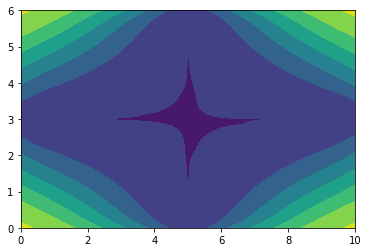

In [195]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(XX, YY, S1)

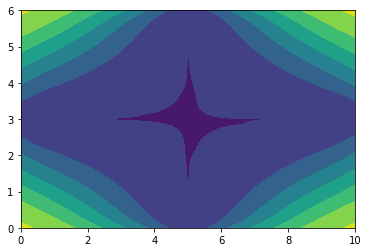

In [196]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(XX, YY, S3)

In [197]:
S1max = Max(S1)
S1max

24406330.21410186

In [198]:
S1min = Min(S1)
S1min

-7097.397822478786

In [199]:
S3max = Max(S3)
S3max

24406330.21410186

In [200]:
S3min = Min(S3)
S3min

-7097.397822478786

In [201]:
S13max = max(S1max, S1min, S3max, S3min)
S13max

24406330.21410186

Расчетное сопротивление материала:

In [202]:
Ru = 525*1000000

Проверка выполнения условия прочности:

In [203]:
if S13max < Ru:
    print("Условие прочности по теории максимальных нормальных напряжений выполняется")
else:
    print("Условие прочности по теории максимальных нормальных напряжений не выполняется")

Условие прочности по теории максимальных нормальных напряжений выполняется
